# Top 100 movies on Netflix: Exploratory Data Analysis

## Load the data <a class="anchor" id="loaddata"></a>

Import required libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from wordcloud import WordCloud

Import dataset that was taken from [Kaggle](https://www.kaggle.com/datasets/r1shabhgupta/best-movies-on-netflix).

In [2]:
df = pd.read_csv("100 Best Movies on Netflix.csv", index_col="Rank")
df.head()

,Movie Title,Year,Score,Director,Cast,Critics Consensus
Rank,,,,,,
1,His House,2020,100,Remi Weekes,"Wunmi Mosaku, Sope Dirisu, Matt Smith, Cornell...",Featuring genuine scares through every corrido...
2,How to Train Your Dragon,2010,99,Christopher Sanders,"Jay Baruchel, Gerard Butler, America Ferrera, ...","Boasting dazzling animation, a script with sur..."
3,The Forty-Year-Old Version,2020,99,Radha Blank,"Welker White, Reed Birney, Radha Blank, Peter Kim",The Forty-Year-Old Version opens a compelling ...
4,Under the Shadow,2016,99,Babak Anvari,"Narges Rashidi, Avin Manshadi, Bobby Naderi, R...",Under the Shadow deftly blends seemingly dispa...
5,Monty Python and the Holy Grail,1975,98,Terry Gilliam,"Graham Chapman, John Cleese, Terry Gilliam, Er...",A cult classic as gut-bustingly hilarious as i...


In [3]:
df.tail()

,Movie Title,Year,Score,Director,Cast,Critics Consensus
Rank,,,,,,
96,Fear Street Part Three: 1666,2021,88,Leigh Janiak,"Kiana Madeira, Ashley Zukerman, Gillian Jacobs...",Fear Street Part Three: 1666 sends the slasher...
97,Donnie Brasco,1997,88,Mike Newell,"Al Pacino, Johnny Depp, Michael Madsen, Bruno ...","A stark, nuanced portrait of life in organized..."
98,Inception,2010,87,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Smart, innovative, and thrilling, Inception is..."
99,American Beauty,1999,87,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...","Flawlessly cast and brimming with dark, acid w..."
100,Kung Fu Panda,2008,87,John Stevenson,"Jack Black, Angelina Jolie, Jackie Chan, David...","Kung Fu Panda has a familiar message, but the ..."


This dataset provides information on the 100 best movies available on Netflix up to 2023. The data was collected by manually reviewing Netflix's movie library and selecting the movies based on their popularity, critical acclaim, and user ratings. The dataset contains the following information for each movie:

* **Rank:** The rank of the movie (for indexing);
* **Title:** The name of the movie;
* **Year:** The year the movie was released;
* **Score:** Score given by Rotten Tomatoes;
* **Director:** The name of the movie's director;
* **Cast:** The name of the movie's cast;
* **Critics Consensus:** What the critics are saying about the new movie.

Check data types of each column.

In [4]:
df.dtypes

Movie Title          object
Year                  int64
Score                 int64
Director             object
Cast                 object
Critics Consensus    object
dtype: object

* All types are as required. Year can stay as int64 because it does not have month and day.

## Data cleaning <a class="anchor" id="datacleaning"></a>

Check for missing data.

In [5]:
df.isnull().sum()

Movie Title          0
Year                 0
Score                0
Director             0
Cast                 0
Critics Consensus    0
dtype: int64

* No missing values were found.

Check for duplicate values.

In [6]:
df.duplicated().sum()

0

* No duplicated values were found.

Check whether there are unusual values in numeric columns.

In [7]:
df.describe().loc[["min", "max"]]

,Year,Score
min,1960.0,87.0
max,2022.0,100.0


* All the numeric columns seem to be in the required range.

Check for outliers of numeric columns.

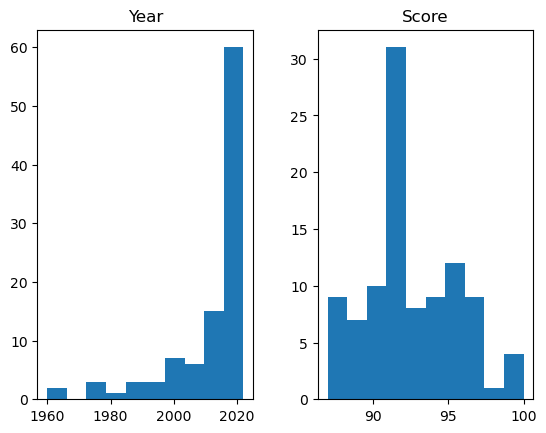

In [8]:
df.hist(grid=False);

* Year 1960 or score 100 might be seen as the outliers, however, they are only due to a natural variation, therefore, they will be kept in the further analysis.

## Exploratory data analysis <a class="anchor" id="eda"></a>

### What is the shape of the dataframe?

In [9]:
print(f"Dataset has {df.shape[0]} rows (observations) and {df.shape[1]} columns (features).")

Dataset has 100 rows (observations) and 6 columns (features).


### What are the top 3 movies?

In [10]:
df.nlargest(3, "Score")

,Movie Title,Year,Score,Director,Cast,Critics Consensus
Rank,,,,,,
1,His House,2020,100,Remi Weekes,"Wunmi Mosaku, Sope Dirisu, Matt Smith, Cornell...",Featuring genuine scares through every corrido...
2,How to Train Your Dragon,2010,99,Christopher Sanders,"Jay Baruchel, Gerard Butler, America Ferrera, ...","Boasting dazzling animation, a script with sur..."
3,The Forty-Year-Old Version,2020,99,Radha Blank,"Welker White, Reed Birney, Radha Blank, Peter Kim",The Forty-Year-Old Version opens a compelling ...


### What are the bottom 3 movies?

In [11]:
df.nsmallest(3, "Score").sort_index(ascending=False)

,Movie Title,Year,Score,Director,Cast,Critics Consensus
Rank,,,,,,
100,Kung Fu Panda,2008,87,John Stevenson,"Jack Black, Angelina Jolie, Jackie Chan, David...","Kung Fu Panda has a familiar message, but the ..."
99,American Beauty,1999,87,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...","Flawlessly cast and brimming with dark, acid w..."
98,Inception,2010,87,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Smart, innovative, and thrilling, Inception is..."


### Are there any directors that have more than 1 top movie? How many?

In [12]:
# Count how many movies each director has
mov_count = df.groupby(["Director"]).agg(
    movie_count=pd.NamedAgg(column="Director", aggfunc="count")
)

# Filter only directors that have more than one movie
mov_count[mov_count["movie_count"] > 1].sort_values(
    by="movie_count", ascending=False).reset_index()

,Director,movie_count
0,Peter Jackson,3
1,Alfred Hitchcock,2
2,Jeremiah Zagar,2
3,Kathryn Bigelow,2
4,Mike Flanagan,2
5,Noah Baumbach,2
6,Paul Greengrass,2
7,Sam Mendes,2
8,Sam Raimi,2


8 directors have 2 movies and 1 director has 3 movies.

### What is the most often director?

In [13]:
dir_filter = df["Director"].mode().to_list()
dir_filter

['Peter Jackson']

### What are the movies of the most often director?

In [14]:
df.loc[df["Director"].isin(dir_filter)]

,Movie Title,Year,Score,Director,Cast,Critics Consensus
Rank,,,,,,
24,The Lord of the Rings: The Two Towers,2002,95,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...",The Two Towers balances spectacular action wit...
38,The Lord of the Rings: The Return of the King,2003,93,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...",Visually breathtaking and emotionally powerful...
63,The Lord of the Rings: The Fellowship of the Ring,2001,91,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","Full of eye-popping special effects, and featu..."


### How many directors in total have their movies in top 100?

In [15]:
df["Director"].nunique()

90

### What is the distribution of movies over the years?

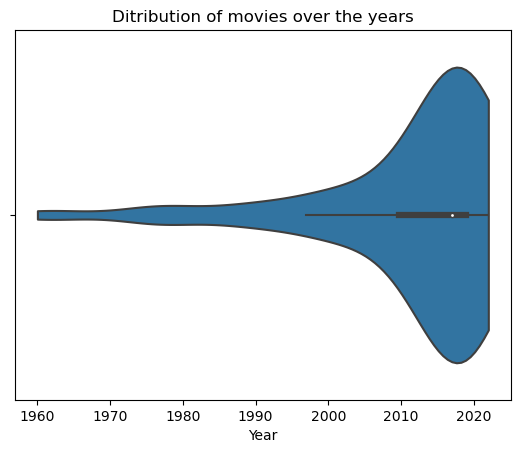

In [16]:
plt.figure()
plt.title("Ditribution of movies over the years")

sns.violinplot(data=df, cut=0, x="Year");

* Distribution is not normal, it is highly skewed to the left.
* Most of the top Netflix movies were made after 2010. One reason for that can be that Netflix is probably more popular between younger people which in turn makes current movies more watchable.

### Which year is the most often?

In [17]:
df["Year"].mode().to_list()

[2019]

### Does score increase with year?

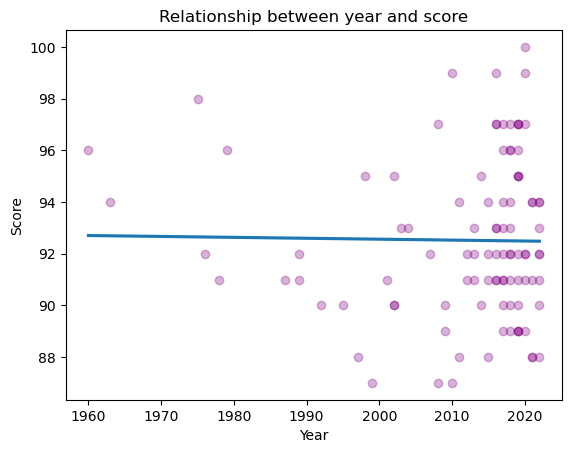

In [18]:
plt.figure()
plt.title("Relationship between year and score")

sns.regplot(
    data=df, x="Year", y="Score", ci=None, scatter_kws={"color": "purple", "alpha": 0.3}
);

* Score does not increase with the year. It seems that regression line slightly negative. Let's check that.

In [19]:
df.corr(numeric_only=True)

,Year,Score
Year,1.000000,-0.015019
Score,-0.015019,1.000000


* Indeed, the relationship between year and score is slightly negative. However, correlation is almost 0, so it cannot be concluded that score indeed decreases with the year.

### What are the most used words in critics consensus?

#### Wordcloud chart

In [20]:
# Transform critics consensus column to separate words
lst = df["Critics Consensus"].to_list()
lst = " ".join(lst)
words_list = re.sub("[,.]", "", lst).lower().split()

In [21]:
# Make a set of meaningless words that should not be included into the counting
stop_words = set(
    "a, an, and, are, as, at, be, but, by, for, if, its, from, "
    "--, in, into, is, it, no, not, of, on, or, such, that, the, "
    "their, then, there, these, they, this, to, was, will, with"
    .split(", ")
)

words = [word for word in words_list if word not in stop_words]
counted = Counter(words)

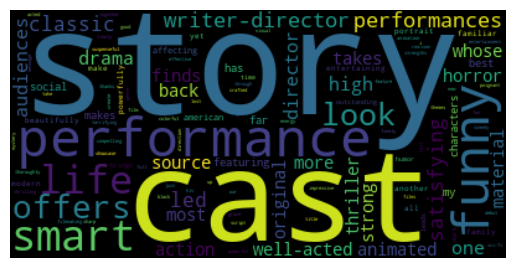

In [22]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=counted)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

#### Bar chart

In [23]:
words_df = (
    pd.DataFrame.from_dict(counted, orient="index", columns=["word_count"])
    .sort_values(by="word_count", ascending=False)
    .reset_index()
)

words_df = words_df.rename(columns={"index": "word"})
top10_words = words_df.head(10)

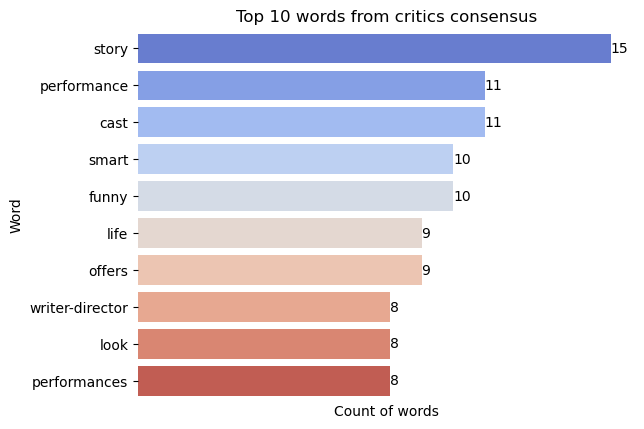

In [24]:
plt.figure()
ax = sns.barplot(top10_words, x="word_count", y="word", orient="h", palette="coolwarm")
plt.xticks([])

# Remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Label all the columns directly
ax.bar_label(ax.containers[0], label_type="edge")

plt.title("Top 10 words from critics consensus")
plt.xlabel("Count of words")
plt.ylabel("Word");

### Who are the most often cast members?

In [25]:
# Transform cast column to separate people
lst = df["Cast"].to_list()
lst = " ".join(lst)
cast_list = lst.split(", ")

counted = Counter(cast_list)

In [26]:
cast_df = (
    pd.DataFrame.from_dict(counted, orient="index", columns=["word_count"])
    .sort_values(by="word_count", ascending=False)
)

top10_cast = cast_df.head(10)
top10_cast

,word_count
Kirsten Dunst,3
Liv Tyler,3
Ian McKellen,3
James Franco,2
Michael Madsen,2
Jason Clarke,2
Zazie Beetz,2
Emma Stone,2
John Cleese,2
Terry Gilliam,2


## Summary <a class="anchor" id="summary"></a>

### Short recap of the analysis:
- **What is the shape of the dataframe?** Dataset has 100 rows and 6 columns.
- **What are the top 3 movies?** "His House", "How to Train Your Dragon", "The Forty-Year-Old-Version".
- **What are the bottom 3 movies?** "Inception", "American Beauty", "Kung Fu Panda".
- **Are there any directors that have more than 1 top movie? How many?** 9 directors have more than one movie.
- **Who is the most often director?** Peter Jackson.
- **What are the movies of the most often director?** All three parts of "The Lord of the Rings".
- **How many directors in total have their movies in top 100?** 90.
- **What is the distribution of movies over the years?** Distribution is not normal, it is highly skewed to the left.
- **Which year is the most often?** 2019.
- **Does score increase with year?** No, it slightly decreases, but the relationship is ambiguous due to small dataset.
- **What are the most used words in critics consensus?** Story, performance, cast.
- **Who are the most often cast members?** 3 movies with: Kirsten Dunst, Liv Tyler, Ian McKellen.

### Ideas for analyses with additional datasets:
* How many people watched each movie?
* What is the age distribution of Netflix watchers?
* How viewer's age impact top movies on Netflix?
* What is the genre for each of the movie?
* Does score and/or watchability increase with some particular genre?
* What are the IMDb ratings for each movie?
* Do IMDb ratings correlate with the score on Netflix?